In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,BattleCreekDec19_2019.txt,BemidjiSep18_2020.txt,CharlestonFeb28_2020.txt,CharlotteMar2_2020.txt,CincinnatiAug1_2019.txt,ColoradorSpringsFeb20_2020.txt,DallasOct17_2019.txt,DesMoinesJan30_2020.txt,FayettevilleSep19_2020.txt,FayettevilleSep9_2019.txt,...,OhioSep21_2020.txt,PhoenixFeb19_2020.txt,PittsburghSep22_2020.txt,TexasSep23_2019.txt,ToledoJan9_2020.txt,TulsaJun20_2020.txt,TupeloNov1_2019.txt,WildwoodJan28_2020.txt,Winston-SalemSep8_2020.txt,YumaAug18_2020.txt
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbott,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
abc,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdelaziz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abducted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Find the top 30 words said in each speech
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'BattleCreekDec19_2019.txt': [('said', 142),
  ('know', 137),
  ('dont', 129),
  ('people', 112),
  ('going', 97),
  ('right', 93),
  ('say', 92),
  ('theyre', 84),
  ('great', 77),
  ('thats', 76),
  ('want', 74),
  ('like', 73),
  ('think', 62),
  ('years', 61),
  ('just', 53),
  ('did', 52),
  ('im', 52),
  ('michigan', 50),
  ('doing', 49),
  ('got', 47),
  ('country', 47),
  ('time', 42),
  ('youre', 42),
  ('come', 42),
  ('didnt', 41),
  ('lot', 39),
  ('hes', 39),
  ('thank', 38),
  ('look', 38),
  ('president', 38)],
 'BemidjiSep18_2020.txt': [('said', 131),
  ('people', 104),
  ('dont', 103),
  ('going', 100),
  ('right', 100),
  ('know', 96),
  ('got', 81),
  ('thats', 78),
  ('hes', 74),
  ('great', 72),
  ('think', 70),
  ('did', 69),
  ('like', 68),
  ('theyre', 65),
  ('im', 64),
  ('good', 59),
  ('want', 59),
  ('say', 58),
  ('youre', 57),
  ('just', 53),
  ('years', 50),
  ('lot', 46),
  ('guy', 45),
  ('thing', 38),
  ('way', 36),
  ('minnesota', 35),
  ('russia', 

In [3]:
# Print the top 15 words said in each speech
for file_list, top_words in top_dict.items():
    print(file_list)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

BattleCreekDec19_2019.txt
said, know, dont, people, going, right, say, theyre, great, thats, want, like, think, years
---
BemidjiSep18_2020.txt
said, people, dont, going, right, know, got, thats, hes, great, think, did, like, theyre
---
CharlestonFeb28_2020.txt
people, great, right, say, going, said, theyre, years, dont, thats, want, know, south, carolina
---
CharlotteMar2_2020.txt
know, going, great, people, right, dont, hes, said, carolina, theyre, doing, north, american, thats
---
CincinnatiAug1_2019.txt
great, said, people, like, good, know, country, going, right, ohio, thats, lot, want, years
---
ColoradorSpringsFeb20_2020.txt
great, said, people, right, dont, hes, going, like, know, got, theyre, thats, trump, want
---
DallasOct17_2019.txt
know, going, people, said, want, great, dont, right, got, thats, theyre, hes, texas, american
---
DesMoinesJan30_2020.txt
going, people, said, great, dont, got, right, know, want, theyre, years, just, say, thats
---
FayettevilleSep19_2020.txt
sa

In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each speech
words = []
for file_list in data.columns:
    top = [word for (word, count) in top_dict[file_list]]
    for t in top:
        words.append(t)
        
words

['said',
 'know',
 'dont',
 'people',
 'going',
 'right',
 'say',
 'theyre',
 'great',
 'thats',
 'want',
 'like',
 'think',
 'years',
 'just',
 'did',
 'im',
 'michigan',
 'doing',
 'got',
 'country',
 'time',
 'youre',
 'come',
 'didnt',
 'lot',
 'hes',
 'thank',
 'look',
 'president',
 'said',
 'people',
 'dont',
 'going',
 'right',
 'know',
 'got',
 'thats',
 'hes',
 'great',
 'think',
 'did',
 'like',
 'theyre',
 'im',
 'good',
 'want',
 'say',
 'youre',
 'just',
 'years',
 'lot',
 'guy',
 'thing',
 'way',
 'minnesota',
 'russia',
 'joe',
 'remember',
 'look',
 'people',
 'great',
 'right',
 'say',
 'going',
 'said',
 'theyre',
 'years',
 'dont',
 'thats',
 'want',
 'know',
 'south',
 'carolina',
 'country',
 'thank',
 'think',
 'like',
 'hes',
 'just',
 'doing',
 'got',
 'did',
 'year',
 'incredible',
 'president',
 'im',
 'america',
 'american',
 'lot',
 'know',
 'going',
 'great',
 'people',
 'right',
 'dont',
 'hes',
 'said',
 'carolina',
 'theyre',
 'doing',
 'north',
 'ameri

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('people', 35),
 ('great', 35),
 ('want', 35),
 ('like', 35),
 ('said', 34),
 ('know', 34),
 ('dont', 34),
 ('going', 34),
 ('right', 34),
 ('thats', 34),
 ('theyre', 33),
 ('say', 32),
 ('years', 32),
 ('think', 29),
 ('just', 29),
 ('got', 29),
 ('hes', 29),
 ('country', 28),
 ('thank', 26),
 ('did', 25),
 ('im', 25),
 ('good', 25),
 ('lot', 21),
 ('president', 20),
 ('doing', 18),
 ('time', 18),
 ('american', 18),
 ('america', 17),
 ('way', 16),
 ('new', 12),
 ('look', 10),
 ('weve', 10),
 ('biden', 10),
 ('youre', 9),
 ('come', 8),
 ('love', 8),
 ('make', 7),
 ('didnt', 6),
 ('guy', 6),
 ('job', 6),
 ('thing', 5),
 ('joe', 5),
 ('carolina', 5),
 ('china', 5),
 ('big', 5),
 ('remember', 4),
 ('really', 4),
 ('trump', 4),
 ('won', 4),
 ('democrats', 4),
 ('sir', 4),
 ('history', 4),
 ('incredible', 3),
 ('north', 3),
 ('wall', 3),
 ('ohio', 3),
 ('states', 3),
 ('deal', 3),
 ('pennsylvania', 3),
 ('state', 3),
 ('win', 3),
 ('hampshire', 3),
 ('michigan', 2),
 ('year', 2),
 ('believ

In [6]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['people',
 'great',
 'want',
 'like',
 'said',
 'know',
 'dont',
 'going',
 'right',
 'thats',
 'theyre',
 'say',
 'years',
 'think',
 'just',
 'got',
 'hes',
 'country',
 'thank',
 'did',
 'im',
 'good',
 'lot',
 'president',
 'doing',
 'time',
 'american',
 'america',
 'way',
 'new',
 'look',
 'weve',
 'biden',
 'youre',
 'come',
 'love',
 'make']

In [7]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [8]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

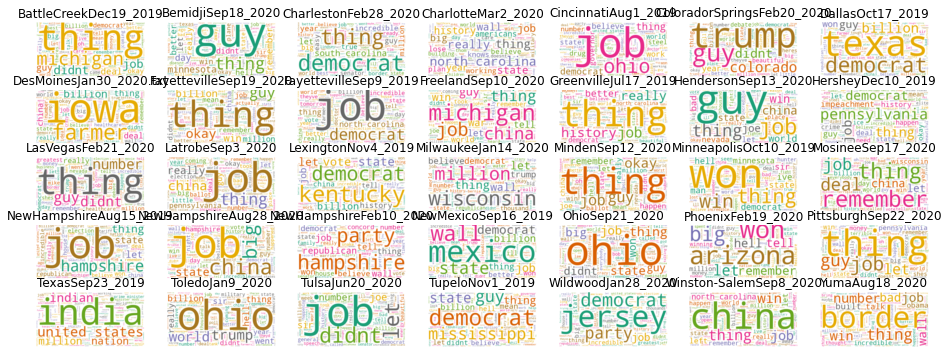

In [9]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['BattleCreekDec19_2019', 'BemidjiSep18_2020',
       'CharlestonFeb28_2020', 'CharlotteMar2_2020',
       'CincinnatiAug1_2019', 'ColoradorSpringsFeb20_2020',
       'DallasOct17_2019', 'DesMoinesJan30_2020.txt',
       'FayettevilleSep19_2020', 'FayettevilleSep9_2019',
       'FreelandSep10_2020', 'GreenvilleJul17_2019',
       'HendersonSep13_2020', 'HersheyDec10_2019',
       'LasVegasFeb21_2020', 'LatrobeSep3_2020',
       'LexingtonNov4_2019', 'MilwaukeeJan14_2020',
       'MindenSep12_2020', 'MinneapolisOct10_2019',
       'MosineeSep17_2020', 'NewHampshireAug15_2019',
       'NewHampshireAug28_2020', 'NewHampshireFeb10_2020',
       'NewMexicoSep16_2019', 'OhioSep21_2020',
       'PhoenixFeb19_2020', 'PittsburghSep22_2020',
       'TexasSep23_2019', 'ToledoJan9_2020', 'TulsaJun20_2020',
       'TupeloNov1_2019', 'WildwoodJan28_2020',
       'Winston-SalemSep8_2020', 'YumaAug18_2020']

# Create subplots for each comedian
for index, file_list in enumerate(data.columns):
    wc.generate(data_clean.transcript[file_list])
    
    plt.subplot(5, 7, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [10]:
# Find the number of unique words in each speech

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for file_list in data.columns:
    uniques = data[file_list].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['file_list', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,file_list,unique_words
28,TexasSep23_2019,645
34,YumaAug18_2020,979
3,CharlotteMar2_2020,1128
23,NewHampshireFeb10_2020,1149
32,WildwoodJan28_2020,1193
4,CincinnatiAug1_2019,1248
9,FayettevilleSep9_2019,1293
2,CharlestonFeb28_2020,1336
16,LexingtonNov4_2019,1337
11,GreenvilleJul17_2019,1359


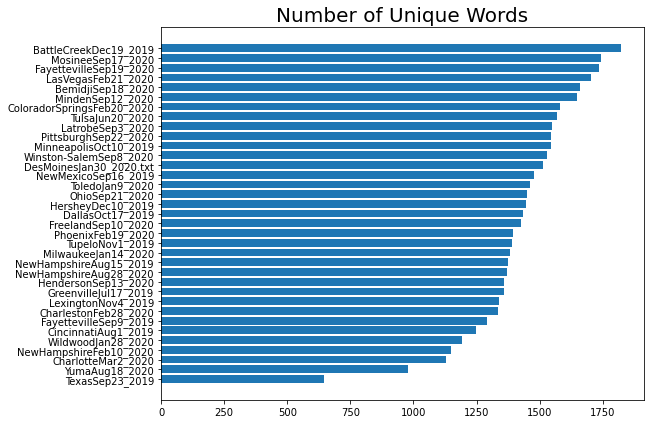

In [11]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.file_list)
plt.title('Number of Unique Words', fontsize=20)

plt.tight_layout()
plt.show()

In [12]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('people', 35),
 ('great', 35),
 ('want', 35),
 ('like', 35),
 ('said', 34),
 ('know', 34),
 ('dont', 34),
 ('going', 34),
 ('right', 34),
 ('thats', 34),
 ('theyre', 33),
 ('say', 32),
 ('years', 32),
 ('think', 29),
 ('just', 29),
 ('got', 29),
 ('hes', 29),
 ('country', 28),
 ('thank', 26),
 ('did', 25),
 ('im', 25),
 ('good', 25),
 ('lot', 21),
 ('president', 20),
 ('doing', 18),
 ('time', 18),
 ('american', 18),
 ('america', 17),
 ('way', 16),
 ('new', 12),
 ('look', 10),
 ('weve', 10),
 ('biden', 10),
 ('youre', 9),
 ('come', 8),
 ('love', 8),
 ('make', 7),
 ('didnt', 6),
 ('guy', 6),
 ('job', 6),
 ('thing', 5),
 ('joe', 5),
 ('carolina', 5),
 ('china', 5),
 ('big', 5),
 ('remember', 4),
 ('really', 4),
 ('trump', 4),
 ('won', 4),
 ('democrats', 4),
 ('sir', 4),
 ('history', 4),
 ('incredible', 3),
 ('north', 3),
 ('wall', 3),
 ('ohio', 3),
 ('states', 3),
 ('deal', 3),
 ('pennsylvania', 3),
 ('state', 3),
 ('win', 3),
 ('hampshire', 3),
 ('michigan', 2),
 ('year', 2),
 ('believ

In [13]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['america', 'american', 'immigrants', 'mexico']]
data_profanity = pd.concat([data_bad_words.america, data_bad_words.american, data_bad_words.immigrants,data_bad_words.mexico ], axis=1)
data_profanity.columns = ['america','american', 'immigrants', 'mexico']
data_profanity

,america,american,immigrants,mexico
BattleCreekDec19_2019.txt,14,19,0,8
BemidjiSep18_2020.txt,11,5,0,0
CharlestonFeb28_2020.txt,18,17,0,3
CharlotteMar2_2020.txt,15,21,0,3
CincinnatiAug1_2019.txt,15,18,0,4
ColoradorSpringsFeb20_2020.txt,14,19,0,4
DallasOct17_2019.txt,18,36,1,4
DesMoinesJan30_2020.txt,18,35,2,9
FayettevilleSep19_2020.txt,19,10,1,1
FayettevilleSep9_2019.txt,24,16,1,5


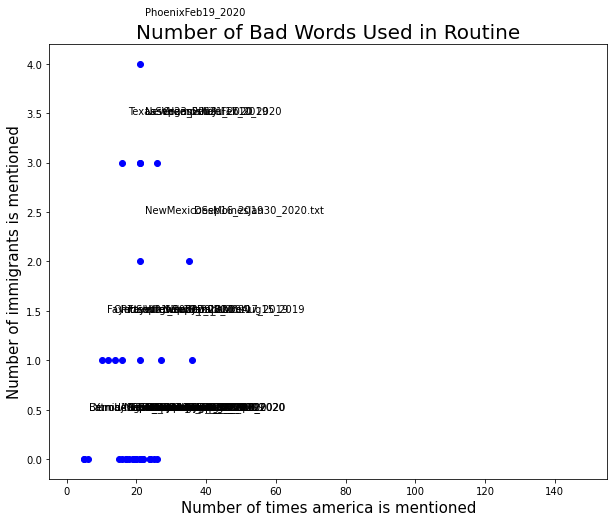

In [14]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, file_list in enumerate(data_profanity.index):
    x = data_profanity.american.loc[file_list]
    y = data_profanity.immigrants.loc[file_list]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of times america is mentioned', fontsize=15)
plt.ylabel('Number of immigrants is mentioned', fontsize=15)

plt.show()